## Create P-value plot
- It reads the data.
- Generate a datFrame.

In [16]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp
import numpy as np
%matplotlib inline

Read the csv file for lamin expression "lamin_ex_p_value.csv" and store the data in df.

In [17]:
colors_all = "Accent,Blues,Blues_r,BrBG,BrBG_r,BuGn,BuGn_r,BuPu,BuPu_r,CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r"
colors_all = colors_all.replace(" ", "")
#colors_all ="YlGn,YlGnBu,YlGnBu_r,YlGn_r,YlOrBr,YlOrBr_r,YlOrRd,YlOrRd_r"
list_color = list(colors_all.split(","))
#list_color = ['hot_r', 'gist_heat_r', 'afmhot_r']
print(list_color)

['Accent', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth

Just vsualize the data


In [18]:
def plot_violin(infile,n_color):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df = pd.read_csv(infile)
    for mapc in list_color:
        ax = sns.violinplot(x="variable", y="value", data=pd.melt(df), palette=sns.color_palette(mapc, n_colors=n_color))
        y_axis = "Nuc/Cyto YR"
        x_axis = "Substrate Young's Modulus (kPa)"
        ax.set_xlabel(x_axis,fontsize=12)
        ax.set_ylabel(y_axis,fontsize=12)
        ax.set_ylim(0.5,2.9)
        fig = ax.get_figure()
        fig.savefig("boxplot"+mapc+".pdf")
        plt.show()
        plt.close()

In [19]:
def plot_boxplots(infile):
    import seaborn as sns
    import matplotlib.pyplot as plt
    parm_2 = 'PDMS'
    parm_1 = 'PAA'
    my_pal = {parm_2: "#FF0000", parm_1:"#180AD4"}
    df = pd.read_csv(infile, header=[0, 1])
    #print(dfn.head(200))
    #dfn.sort_values(by=['variable_1'], inplace=True)
    #columns = [parm_1, parm_3, parm_2]
    #df = df[columns]
    order = ["0.3", "1","2","5","12","18","21","30","50"]
    #ax = sns.scatterplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal)
    #ax = sns.swarmplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order)
    ax = sns.boxplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order)
    y_axis = "Nuc/Cyto YR"
    x_axis = "Substrate Young's Modulus (kPa)"
    ax.set(xlabel=x_axis, ylabel=y_axis)
    ax.set_ylim(0.5,2.9)
    ax.legend(title=False, fontsize=12)
    ax.set_xlabel(x_axis,fontsize=12)
    ax.set_ylabel(y_axis,fontsize=12)
    fig = ax.get_figure()
    fig.savefig("boxplot_pdms_paa.pdf")
    plt.show()
    plt.close()

In [20]:
def plot_boxplots_1(infile):
    import seaborn as sns
    import matplotlib.pyplot as plt
    parm_2 = 'Endogenous YAP'
    parm_1 = 'Exogenous YAP'
    my_pal = {parm_2: "#FF0000", parm_1:"#00FF00"}
    df = pd.read_csv(infile, header=[0, 1])
    #print(dfn.head(200))
    #dfn.sort_values(by=['variable_1'], inplace=True)
    #columns = [parm_1, parm_3, parm_2]
    #df = df[columns]
    order = ["0.3", "glass"]
    #ax = sns.scatterplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal)
    #ax = sns.swarmplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order)
    ax = sns.boxplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order, width = 0.4)
    y_axis = "Nuc/Cyto YR"
    x_axis = "Substrate Young's Modulus (kPa)"
    ax.set(xlabel=x_axis, ylabel=y_axis)
    ax.set_ylim(0.5,2.9)
    ax.legend(title=False, fontsize=12)
    ax.set_xlabel(x_axis,fontsize=12)
    ax.set_ylabel(y_axis,fontsize=12)
    fig = ax.get_figure()
    fig.savefig("end_exd_yap.pdf")
    plt.show()
    plt.close()

## Plot for the first data

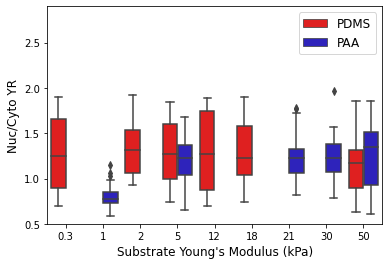

In [21]:
#infile = "paper_1_box_plot_1.csv"
#plot_violin(infile,7)


infile = "plot_pdms_pa.csv"
plot_boxplots(infile)


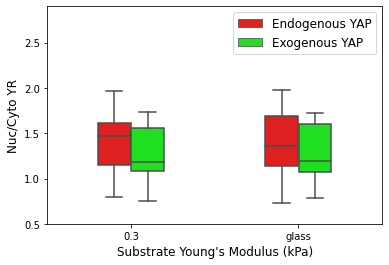

In [22]:
infile = "end_exd_yap.csv"
plot_boxplots_1(infile)

In [23]:
def plot_boxplots_3(infile):
    import seaborn as sns
    import matplotlib.pyplot as plt

    df = pd.read_csv(infile)
    order = ['1', '5', '20', '50']
    
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=sns.color_palette('Blues'), order=order, width = 0.5)
    y_axis = "Nuc/Cyto YR"
    x_axis = "Substrate Young's Modulus (kPa)"
    ax.set(xlabel=x_axis, ylabel=y_axis)
    ax.set_ylim(0.5,2.9)
    #ax.legend(title=False, fontsize=12)
    ax.set_xlabel(x_axis,fontsize=12)
    ax.set_ylabel(y_axis,fontsize=12)
    fig = ax.get_figure()
    fig.savefig("paa_yap.pdf")
    plt.show()
    plt.close()

In [24]:
def plot_violin_2(infile):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df = pd.read_csv(infile)
    ax = sns.violinplot(x="variable", y="value", data=pd.melt(df), palette=sns.color_palette('Blues'))
    y_axis = "Nuc/Cyto YR"
    x_axis = "Substrate Young's Modulus (kPa)"
    ax.set_xlabel(x_axis,fontsize=12)
    ax.set_ylabel(y_axis,fontsize=12)
    ax.set_ylim(0.5,2.9)
    fig = ax.get_figure()
    fig.savefig("violinplot_paa.pdf")
    plt.show()
    plt.close()

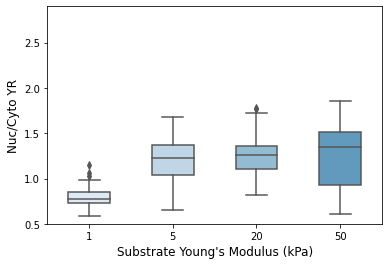

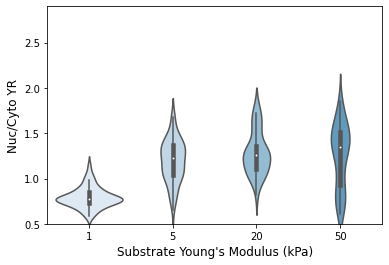

In [25]:
infile = "yap_paa.csv"
df = pd.read_csv(infile)
plot_boxplots_3(infile)
plot_violin_2(infile)

In [26]:
import itertools
alpha = 0.05 
paired_list = df.columns
paired = itertools.combinations(paired_list, 2)
#print(paired)
#print(paired)
for var in paired:
    parm1 = var[0]
    parm2 = var[1]
    print(var)
    x = df[parm1].dropna()
    y = df[parm2].dropna()
    
    ttest1,pval1 = stats.ttest_ind(x, y)
    print("this is P-value between {} and {}: {}".format(parm1, parm2, pval1))
    print("this is T-value between {} and {}: {}".format(parm1, parm2, ttest1))


('1', '5')
this is P-value between 1 and 5: 1.0378636989363593e-22
this is T-value between 1 and 5: -12.227614381824587
('1', '20')
this is P-value between 1 and 20: 1.3350800708502428e-25
this is T-value between 1 and 20: -14.054294001367895
('1', '50')
this is P-value between 1 and 50: 4.6005618428109955e-17
this is T-value between 1 and 50: -9.807259713077574
('5', '20')
this is P-value between 5 and 20: 0.06602091653043948
this is T-value between 5 and 20: -1.8582247040098225
('5', '50')
this is P-value between 5 and 50: 0.28152898922461006
this is T-value between 5 and 50: -1.0817179457353392
('20', '50')
this is P-value between 20 and 50: 0.643273337219315
this is T-value between 20 and 50: 0.4644690990075678


## Plot for March 2023

     variable_0 variable_1     value
0          PDMS        0.3  0.700000
1          PDMS        0.3  0.794018
2          PDMS        0.3  0.800000
3          PDMS        0.3  1.408435
4          PDMS        0.3  1.045572
...         ...        ...       ...
1106        PAA         50       NaN
1107        PAA         50       NaN
1108        PAA         50       NaN
1109        PAA         50       NaN
1110        PAA         50       NaN

[1111 rows x 3 columns]


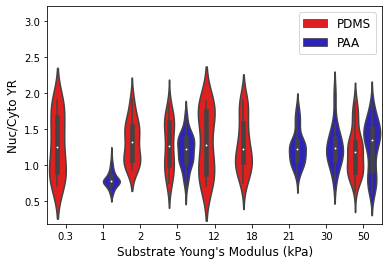

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
infile = "plot_pdms_pa.csv"
df = pd.read_csv(infile, header=[0, 1])
order = ["0.3", "1","2","5","12","18","21","30","50"]
parm_2 = 'PDMS'
parm_1 = 'PAA'
my_pal = {parm_2: "#FF0000", parm_1:"#180AD4"}
print(pd.melt(df))
ax = sns.violinplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order, width=0.9)
y_axis = "Nuc/Cyto YR"
x_axis = "Substrate Young's Modulus (kPa)"
ax.set(xlabel=x_axis, ylabel=y_axis)
ax.set_ylim(0.18,3.2)
ax.legend(title=False, fontsize=12)
ax.set_xlabel(x_axis,fontsize=12)
ax.set_ylabel(y_axis,fontsize=12)
fig = ax.get_figure()
fig.savefig("boxplot_pdms_paa_violin.pdf")
plt.show()
plt.close()

In [28]:
import itertools
alpha = 0.05 
paired_list = df.columns
paired = itertools.combinations(paired_list, 2)
#print(paired)
#print(paired)
for var in paired:
    parm1 = var[0]
    parm2 = var[1]
    print(var)
    x = df[parm1].dropna()
    y = df[parm2].dropna()
    
    ttest1,pval1 = stats.ttest_ind(x, y)
    print("this is P-value between {} and {}: {}".format(parm1, parm2, pval1))
    print("this is T-value between {} and {}: {}".format(parm1, parm2, ttest1))


(('PDMS', '0.3'), ('PAA', '1'))
this is P-value between ('PDMS', '0.3') and ('PAA', '1'): 4.832110131587619e-12
this is T-value between ('PDMS', '0.3') and ('PAA', '1'): 8.08084193880024
(('PDMS', '0.3'), ('PDMS', '2'))
this is P-value between ('PDMS', '0.3') and ('PDMS', '2'): 0.5746779730799909
this is T-value between ('PDMS', '0.3') and ('PDMS', '2'): -0.5646086355946626
(('PDMS', '0.3'), ('PDMS', '5'))
this is P-value between ('PDMS', '0.3') and ('PDMS', '5'): 0.9836454285698484
this is T-value between ('PDMS', '0.3') and ('PDMS', '5'): -0.020597676403121365
(('PDMS', '0.3'), ('PAA', '5'))
this is P-value between ('PDMS', '0.3') and ('PAA', '5'): 0.32347366634801966
this is T-value between ('PDMS', '0.3') and ('PAA', '5'): 0.99332524242321
(('PDMS', '0.3'), ('PDMS', '12'))
this is P-value between ('PDMS', '0.3') and ('PDMS', '12'): 0.7119936344634133
this is T-value between ('PDMS', '0.3') and ('PDMS', '12'): -0.3716296561683822
(('PDMS', '0.3'), ('PDMS', '18'))
this is P-value bet

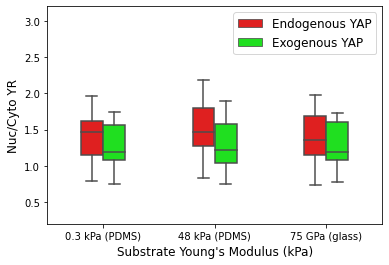

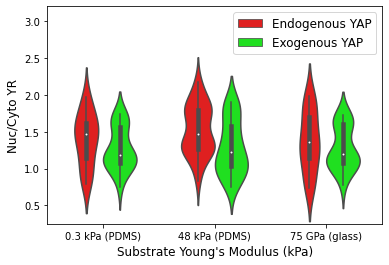

In [29]:
infile = "end_exd_yap_v2.csv"
import seaborn as sns
import matplotlib.pyplot as plt
parm_2 = 'Endogenous YAP'
parm_1 = 'Exogenous YAP'
my_pal = {parm_2: "#FF0000", parm_1:"#00FF00"}
df = pd.read_csv(infile, header=[0, 1])
order = ["0.3 kPa (PDMS)", "48 kPa (PDMS)", "75 GPa (glass)"]
ax = sns.boxplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order, width = 0.4)
#ax = sns.violinplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order, width = 0.4)
y_axis = "Nuc/Cyto YR"
x_axis = "Substrate Young's Modulus (kPa)"
ax.set(xlabel=x_axis, ylabel=y_axis)
ax.set_ylim(0.2,3.2)
ax.legend(title=False, fontsize=12)
ax.set_xlabel(x_axis,fontsize=12)
ax.set_ylabel(y_axis,fontsize=12)
fig = ax.get_figure()
fig.savefig("end_exd_yap_box_plot.pdf")
plt.show()
plt.close()



ax = sns.violinplot(x="variable_1", y="value", hue="variable_0", data=pd.melt(df), palette=my_pal, order=order, width = 0.6)
y_axis = "Nuc/Cyto YR"
x_axis = "Substrate Young's Modulus (kPa)"
ax.set(xlabel=x_axis, ylabel=y_axis)
ax.set_ylim(0.25,3.2)
ax.legend(title=False, fontsize=12)
ax.set_xlabel(x_axis,fontsize=12)
ax.set_ylabel(y_axis,fontsize=12)
fig = ax.get_figure()
fig.savefig("end_exd_yap_violin_plot.pdf")
plt.show()
plt.close()

       variable     value
0  LamA/C siRNA  3.048080
1  LamA/C siRNA  3.831711
2  LamA/C siRNA  4.066295
3  LamA/C siRNA  3.429876
4  LamA/C siRNA  1.983108


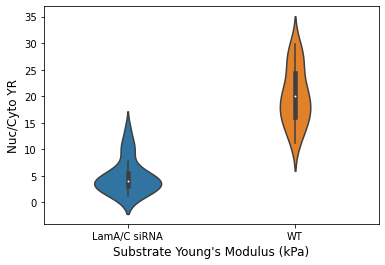

In [30]:
infile = "lamin_ex_p_value.csv"
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(infile)

df = df[["LamA/C siRNA","WT"]]
print(pd.melt(df).head())
order = ["LamA/C siRNA","WT"]
ax = sns.violinplot(x="variable", y="value",  data=pd.melt(df),  order=order, width = 0.4)
y_axis = "Nuc/Cyto YR"
x_axis = "Substrate Young's Modulus (kPa)"
ax.set(xlabel=x_axis, ylabel=y_axis)
ax.set_xlabel(x_axis,fontsize=12)
ax.set_ylabel(y_axis,fontsize=12)
fig = ax.get_figure()
fig.savefig("LamA_WT.pdf")
plt.show()
plt.close()

